In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout, GRU, Bidirectional
from keras.optimizers import SGD
import math
from sklearn.metrics import mean_squared_error

/Users/yupeng/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
# Some functions to help out with
def plot_predictions(test,predicted):
    plt.plot(test, color='red',label='Real IBM Stock Price')
    plt.plot(predicted, color='blue',label='Predicted IBM Stock Price')
    plt.title('IBM Stock Price Prediction')
    plt.xlabel('Time')
    plt.ylabel('IBM Stock Price')
    plt.legend()
    plt.show()

def return_rmse(test,predicted):
    rmse = math.sqrt(mean_squared_error(test, predicted))
    print("The root mean squared error is {}.".format(rmse))

In [89]:
# First, we get the data
dataset = pd.read_csv('IBM_2006-01-01_to_2018-01-01.csv', index_col='Date', parse_dates=['Date'])
dataset.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [25]:
# Checking for missing values
training_set = dataset[:'2016'].iloc[:,1:2].values
test_set = dataset['2017':].iloc[:,1:2].values

In [88]:
dataset.tail()

,Open,High,Low,Close,Volume,Name
Date,,,,,,
2017-12-22,151.82,153.00,151.50,152.50,2990583,IBM
2017-12-26,152.51,153.86,152.50,152.83,2479017,IBM
2017-12-27,152.95,153.18,152.61,153.13,2149257,IBM
2017-12-28,153.20,154.12,153.20,154.04,2687624,IBM
2017-12-29,154.17,154.72,153.42,153.42,3327087,IBM


In [90]:
dataset_total.tail()

Date
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, dtype: float64

In [91]:
len(test_set)

251

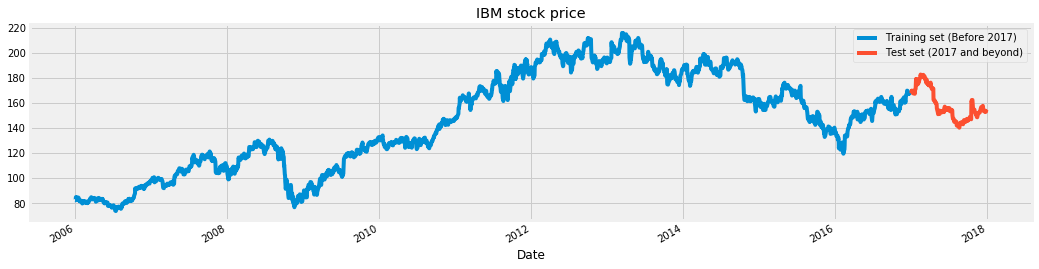

In [27]:
# We have chosen 'High' attribute for prices. Let's see what it looks like
dataset["High"][:'2016'].plot(figsize=(16,4),legend=True)
dataset["High"]['2017':].plot(figsize=(16,4),legend=True)
plt.legend(['Training set (Before 2017)','Test set (2017 and beyond)'])
plt.title('IBM stock price')
plt.show()

In [28]:
# Scaling the training set
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [49]:
len(dataset["High"][:'2016'])

2769

In [34]:
# Since LSTMs store long term memory state, we create a data structure with 60 timesteps and 1 output
# So for each element of training set, we have 60 previous training set elements 
X_train = []
y_train = []
for i in range(60,2769):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [51]:
X_train

array([[0.06065089, 0.06029868, 0.06311637, ..., 0.0656523 , 0.06656805,
        0.06769513],
       [0.06029868, 0.06311637, 0.0781206 , ..., 0.06656805, 0.06769513,
        0.06875176],
       [0.06311637, 0.0781206 , 0.07262609, ..., 0.06769513, 0.06875176,
        0.06804734],
       ...,
       [0.594745  , 0.59587208, 0.59094111, ..., 0.66420118, 0.65898845,
        0.66244012],
       [0.59587208, 0.59094111, 0.58812342, ..., 0.65898845, 0.66244012,
        0.66074951],
       [0.59094111, 0.58812342, 0.59002536, ..., 0.66244012, 0.66074951,
        0.65546633]])

In [50]:
len(X_train)

2709

In [61]:
# Reshaping X_train for efficient modelling
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

In [72]:
X_train.shape[0]

2709

In [74]:
Sequential()

In [11]:
# The LSTM architecture
regressor = Sequential()
# First LSTM layer with Dropout regularisation
regressor.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Second LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Third LSTM layer
regressor.add(LSTM(units=50, return_sequences=True))
regressor.add(Dropout(0.2))
# Fourth LSTM layer
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))
# The output layer
regressor.add(Dense(units=1))

# Compiling the RNN
regressor.compile(optimizer='rmsprop',loss='mean_squared_error')
# Fitting to the training set
regressor.fit(X_train,y_train,epochs=5,batch_size=32)

Epoch 1/5
2709/2709 [==============================] - 15s 5ms/step - loss: 0.0233
Epoch 2/5
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0103
Epoch 3/5
2709/2709 [==============================] - 12s 5ms/step - loss: 0.0082
Epoch 4/5
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0076
Epoch 5/5
2709/2709 [==============================] - 13s 5ms/step - loss: 0.0063


In [86]:
# Now to get the test set ready in a similar way as the training set.
# The following has been done so forst 60 entires of test set have 60 previous values which is impossible to get unless we take the whole 
# 'High' attribute data for processing
dataset_total = pd.concat((dataset["High"][:'2016'],dataset["High"]['2017':]),axis=0)
inputs = dataset_total[len(dataset_total)-len(test_set) - 60:].values
inputs = inputs.reshape(-1,1)
inputs  = sc.transform(inputs)


In [98]:
len(dataset_total[len(dataset_total)-len(test_set) - 60:])

311

In [96]:
len(dataset_total)-len(test_set) - 60

2709

In [94]:
len(dataset_total)

3020

In [95]:
len(dataset)

3020

In [80]:
len(dataset_total)-len(test_set) - 60

2709

In [82]:
inputs=dataset_total[len(dataset_total)-len(test_set) - 60:].values

In [87]:
inputs

array([[0.58812342],
       [0.59002536],
       [0.59559031],
       [0.58474218],
       [0.57079459],
       [0.56551141],
       [0.57473936],
       [0.57727529],
       [0.54282897],
       [0.55304311],
       [0.55621302],
       [0.5438856 ],
       [0.54649197],
       [0.54395604],
       [0.55649479],
       [0.56438433],
       [0.56706114],
       [0.56628628],
       [0.5633277 ],
       [0.55931248],
       [0.56213018],
       [0.56142575],
       [0.57882502],
       [0.57755706],
       [0.57495069],
       [0.61439842],
       [0.61566638],
       [0.61932939],
       [0.6002395 ],
       [0.6030572 ],
       [0.60573401],
       [0.61129896],
       [0.62735982],
       [0.62735982],
       [0.62299239],
       [0.62869822],
       [0.63905325],
       [0.63729219],
       [0.63299521],
       [0.62172443],
       [0.60826994],
       [0.61432798],
       [0.61179205],
       [0.64271626],
       [0.64849253],
       [0.65356438],
       [0.65405748],
       [0.676

In [84]:
inputs.reshape(-1,1)

array([[157.43],
       [157.7 ],
       [158.49],
       [156.95],
       [154.97],
       [154.22],
       [155.53],
       [155.89],
       [151.  ],
       [152.45],
       [152.9 ],
       [151.15],
       [151.52],
       [151.16],
       [152.94],
       [154.06],
       [154.44],
       [154.33],
       [153.91],
       [153.34],
       [153.74],
       [153.64],
       [156.11],
       [155.93],
       [155.56],
       [161.16],
       [161.34],
       [161.86],
       [159.15],
       [159.55],
       [159.93],
       [160.72],
       [163.  ],
       [163.  ],
       [162.38],
       [163.19],
       [164.66],
       [164.41],
       [163.8 ],
       [162.2 ],
       [160.29],
       [161.15],
       [160.79],
       [165.18],
       [166.  ],
       [166.72],
       [166.79],
       [169.95],
       [169.89],
       [169.85],
       [169.11],
       [167.26],
       [168.25],
       [167.94],
       [168.23],
       [167.49],
       [167.98],
       [167.74],
       [166.99

In [13]:
# Preparing X_test and predicting the prices
X_test = []
for i in range(60,311):
    X_test.append(inputs[i-60:i,0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

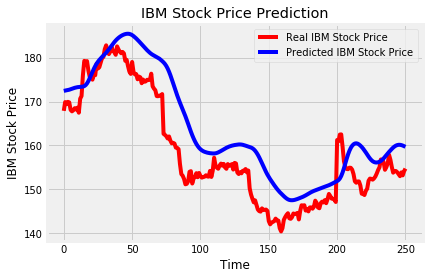

In [14]:
# Visualizing the results for LSTM
plot_predictions(test_set,predicted_stock_price)

In [99]:
dataset_total[len(dataset_total)-len(test_set) - 60:].values

array([157.43, 157.7 , 158.49, 156.95, 154.97, 154.22, 155.53, 155.89,
       151.  , 152.45, 152.9 , 151.15, 151.52, 151.16, 152.94, 154.06,
       154.44, 154.33, 153.91, 153.34, 153.74, 153.64, 156.11, 155.93,
       155.56, 161.16, 161.34, 161.86, 159.15, 159.55, 159.93, 160.72,
       163.  , 163.  , 162.38, 163.19, 164.66, 164.41, 163.8 , 162.2 ,
       160.29, 161.15, 160.79, 165.18, 166.  , 166.72, 166.79, 169.95,
       169.89, 169.85, 169.11, 167.26, 168.25, 167.94, 168.23, 167.49,
       167.98, 167.74, 166.99, 166.7 , 167.87, 169.87, 169.39, 169.92,
       169.8 , 168.09, 167.76, 168.01, 168.48, 168.18, 168.59, 167.45,
       170.64, 171.25, 176.  , 179.25, 178.88, 179.2 , 177.07, 175.58,
       175.7 , 174.97, 176.34, 175.98, 178.62, 177.5 , 177.8 , 178.87,
       179.9 , 180.13, 181.92, 182.79, 181.57, 180.79, 181.34, 182.5 ,
       181.49, 181.25, 180.63, 182.55, 181.88, 181.32, 180.99, 181.29,
       180.95, 179.25, 179.49, 178.06, 176.82, 176.28, 179.  , 176.79,
      

In [105]:
dataset["2017":]['High'].tail(10)

Date
2017-12-15    153.80
2017-12-18    154.18
2017-12-19    154.17
2017-12-20    153.89
2017-12-21    153.46
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, dtype: float64

In [106]:
dataset_total.tail()

Date
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, dtype: float64

In [107]:
dataset[:"2017"]['High'].tail(10)

Date
2017-12-15    153.80
2017-12-18    154.18
2017-12-19    154.17
2017-12-20    153.89
2017-12-21    153.46
2017-12-22    153.00
2017-12-26    153.86
2017-12-27    153.18
2017-12-28    154.12
2017-12-29    154.72
Name: High, dtype: float64